In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
from sklearn.metrics import accuracy_score

In [6]:
# Load the dataset
mat = sio.loadmat('/home/utkarsh/Documents/iitb/gnr602/project/dataset/Indian Pines/Indian_pines.mat')
mat_gt = sio.loadmat('/home/utkarsh/Documents/iitb/gnr602/project/dataset/Indian Pines/Indian_pines_gt.mat')

data = mat['indian_pines']
labels = mat_gt['indian_pines_gt']
print(data.shape)

(145, 145, 220)


Accuracy: 0.7541217501585289


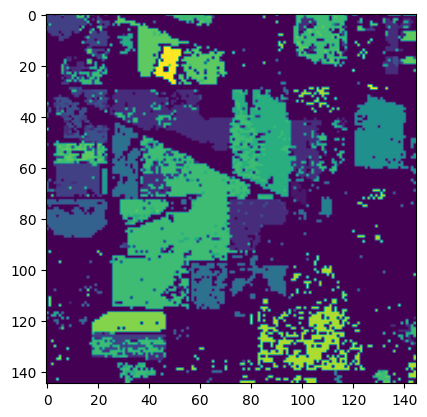

In [22]:
# Reshape the data to (num_samples, num_features)
n, m, num_samples = data.shape
data_reshaped = np.reshape(data, (n*m, num_samples))
labels_reshaped = np.reshape(labels, (n*m,))

# Apply LDA to reduce the dimensionality of the data
num_components = 16
lda = LDA(n_components=num_components)
data_lda = lda.fit_transform(data_reshaped, labels.ravel())

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_lda, labels_reshaped, test_size=0.3, random_state=42)

# Create an SVM classifier and train it on the training set
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate the SVM classifier on the test set
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Reshape the cluster labels and display the segmented image
cluster_labels = svm.predict(data_lda)
cluster_labels_reshaped = np.reshape(cluster_labels, (n, m))
plt.imshow(cluster_labels_reshaped)
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error

# Reshape the cluster labels to a 1D array
cluster_labels_flat = np.reshape(cluster_labels_reshaped, (n*m,))

# Compute the mean squared error between the predicted labels and the ground truth labels
mse = mean_squared_error(labels_reshaped, cluster_labels_flat)

print("MSE:", mse)

MSE: 23.319952437574315
